# Data Munging and Exploration

In [6]:
import os
#os.chdir('C:\Users\Lundi\Documents\Programming\Python\Kaggle\Titanic - 2015')
os.chdir('/Users/alexsutherland/Documents/Programming/Python/Kaggle/Titanic---2015')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Data

In [7]:
training_data_full = pd.read_csv('Data/train.csv')

#### Converting Sex to dummy variable

In [8]:
training_data_v1 = training_data_full.copy()
training_data_v1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

So there are only 'male' and 'female' categories in sex. This can easily be converted into a dummy variable:

In [10]:
sex_column = training_data_v1['Sex']
sex_dummies = pd.get_dummies(sex_column)
sex_dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Adding the male dummy variable column to the training_data table:

In [11]:
training_data_v1['Is_male'] = sex_dummies['male']
training_data_v1 = training_data_v1.drop(['Sex'], axis=1)
training_data_v1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_male
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN,S,1


#### Converting Embarked to dummies

In [12]:
training_data_v1[['Embarked Q','Embarked S']] = pd.get_dummies(training_data_v1['Embarked']).drop(['C'],axis=1)
training_data_v1 = training_data_v1.drop(['Embarked'], axis=1)
training_data_v1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Is_male,Embarked Q,Embarked S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN,1,0,1


#### Dropping Names
Because names likely won't make a huge difference in my first model, I will drop them:

In [13]:
training_data_v2 = training_data_v1.drop(['Name'], axis=1)
training_data_v2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Is_male,Embarked Q,Embarked S
0,1,0,3,22,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,38,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,35,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,35,0,0,373450,8.0500,NaN,1,0,1


#### Dropping Ticket
Don't know how this will help me at the moment, so I will drop it:

In [14]:
training_data_v3 = training_data_v2.drop(['Ticket'], axis=1)
training_data_v3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Is_male,Embarked Q,Embarked S
0,1,0,3,22,1,0,7.2500,NaN,1,0,1
1,2,1,1,38,1,0,71.2833,C85,0,0,0
2,3,1,3,26,0,0,7.9250,NaN,0,0,1
3,4,1,1,35,1,0,53.1000,C123,0,0,1
4,5,0,3,35,0,0,8.0500,NaN,1,0,1


## Exploring Variable Measure of Central Tendency and Variance

In [15]:
training_data_v3.head(8)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Is_male,Embarked Q,Embarked S
0,1,0,3,22,1,0,7.2500,NaN,1,0,1
1,2,1,1,38,1,0,71.2833,C85,0,0,0
2,3,1,3,26,0,0,7.9250,NaN,0,0,1
3,4,1,1,35,1,0,53.1000,C123,0,0,1
4,5,0,3,35,0,0,8.0500,NaN,1,0,1
5,6,0,3,NaN,0,0,8.4583,NaN,1,1,0
6,7,0,1,54,0,0,51.8625,E46,1,0,1
7,8,0,3,2,3,1,21.0750,NaN,1,0,1


In [16]:
training_data_v3.count()

PassengerId    891
Survived       891
Pclass         891
Age            714
SibSp          891
Parch          891
Fare           891
Cabin          204
Is_male        891
Embarked Q     891
Embarked S     891
dtype: int64

### Sample Counts

As can be seen in the count() table; age and cabin are missing in many multiple samples. Embarked is also missing in two samples.

Because Cabin is missing in so many training examples, it will be removed:


In [17]:
training_data_v4 = training_data_v3.drop(['Cabin'], axis=1)
training_data_v4.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Is_male,Embarked Q,Embarked S
0,1,0,3,22,1,0,7.25,1,0,1


### Missing Ages

For missing ages, the number of missing ages is quite high and it is likely to be a good predictor (e.g., babies would be saved before middle aged men). Therefore, I will attempt to impute the age using PCA. 

This will be done by finding a reasonable age to start out with, then PCA'ing it, reducing it's dimensionality, and then bringing it back to the original dimensions. This is repeated until the ages don't change with each step. 

First, I will try to predict age from the other variables:


#### Looking at feature correlations with age

In [18]:
training_data_v4.dropna().corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Is_male,Embarked Q,Embarked S
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592,0.024575,-0.026954,0.004621
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.538826,-0.049549,-0.164235
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.155460,0.132415,0.203980
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.022405,-0.032523
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.103950,0.051619,0.021751
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.246972,-0.009126,0.015833
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.184994,-0.062765,-0.253991
Is_male,0.024575,-0.538826,0.155460,0.093254,-0.103950,-0.246972,-0.184994,1.000000,-0.026440,0.115167
Embarked Q,-0.026954,-0.049549,0.132415,-0.022405,0.051619,-0.009126,-0.062765,-0.026440,1.000000,-0.375934
Embarked S,0.004621,-0.164235,0.203980,-0.032523,0.021751,0.015833,-0.253991,0.115167,-0.375934,1.000000


From these correlations, I can see that the Pclass is inversely related to age, as well as the number of Siblings/Spouses and Parents/Children.

#### Fitting features to age 

In [19]:
from sklearn.linear_model import LinearRegression
import sklearn.cross_validation as skl_cv

lr_reg = LinearRegression()

training_data_v4_fit_age = training_data_v4.dropna()
X_fit_age = training_data_v4_fit_age.drop(['Age'], axis=1)
y_fit_age = training_data_v4_fit_age['Age']

print 'Mean absolute errors for fitting to Age'
skl_cv.cross_val_score(lr_reg, X_fit_age, y_fit_age, cv=10, scoring='mean_absolute_error')


Mean absolute errors for fitting to Age


array([ -9.46826165, -10.16654791,  -9.15005785,  -9.65559692,
        -9.86194633,  -9.84860904, -10.84089289, -10.07112566,
       -10.47601237, -10.48244645])

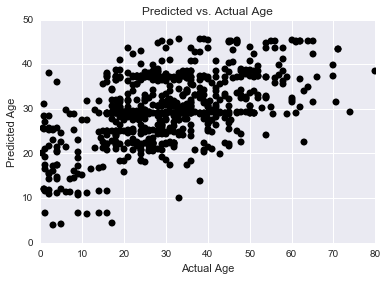

In [20]:
lr_reg.fit(X_fit_age, y_fit_age)
y_fit_age_predict = lr_reg.predict(X_fit_age)

plt.plot(y_fit_age, y_fit_age_predict, 'ko');
ax = plt.gca()
ax.set_xlabel('Actual Age');
ax.set_ylabel('Predicted Age');
ax.set_title('Predicted vs. Actual Age')

#### Residual Plot

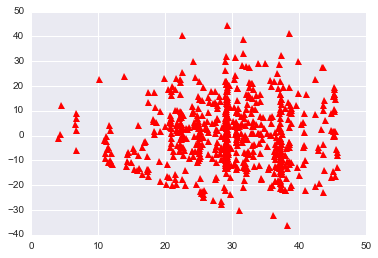

In [21]:
plt.plot(y_fit_age_predict, (y_fit_age - y_fit_age_predict), 'r^')

This looks like heteroscedasticity, because of the funnel shape. Let's look at the distribution of residuals:

NormaltestResult(statistic=21.570878488224793, pvalue=2.0698708641399532e-05)

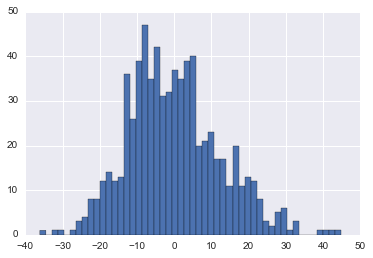

In [22]:
import scipy
plt.hist((y_fit_age - y_fit_age_predict), bins=50);

scipy.stats.mstats.normaltest((y_fit_age - y_fit_age_predict))

So the residuals are normally distributed, however, they exhibit heteroscedasticity.

That's all for today. Let's export the current version of the data and continue this tomorrow:

In [23]:
training_data_v4.to_csv('Data/training_data_v4.csv')